# Machine Learning project Multilayer Perceptron


# 1. Overview
## 1-1. Multilayer perceptron

### ユニット
ニューラルネットワークを構成する最小の要素をユニットという。 \
複数の入力を受け取り、1つの出力を計算する。

<div style="text-align: center;">
    <img src="./img/unit.png" style="width: 200px;"/>
</div>

4つの入力 $x_1,x_2,x_3,x_4$ を受け取り、このユニットが受け取る総入力 $u$ は、
$$
u = w_1 x_1 + w_2 x_2 + w_3 x_3 + w_4 x_4 + b
$$
のように、各入力に異なる重み(weight) $w_1,w_2,w_3,w_4$ をかけて加算したものに、バイアス(bias) $b$ を足したものとなる。\
ユニットは、総入力 $u$ を活性化関数 $f$ に入れて得られる値、
$$
z = f(u)
$$
を出力する。
\
\
\
ユニットを3つ並べたものを考え、それぞれ4つの入力 $x_1,x_2,x_3,x_4$ を等しく受け取るとする。

<div style="text-align: center;">
    <img src="./img/unit_multi.png" style="width: 200px;"/>
</div>

これらの入力をインデックス $i=1,...,4$ で表し、3つのユニットを $j=1,2,3$ で表す。\
入力とユニット間の結合は全部で $3 \times 4 = 12$ 本あり、その1つ1つに異なる重み $w_{j,i}$ が与えられるとする。\
つまり3つのユニットが受け取る入力はそれぞれ
$$
\begin{align*}
u_{1} &= w_{1,1} x_{1} + w_{1,2} x_{2} + w_{1,3} x_{3} + w_{1,4} x_{4} + b_{1}\\
\\
u_{2} &= w_{2,1} x_{1} + w_{2,2} x_{2} + w_{2,3} x_{3} + w_{2,4} x_{4} + b_{2}\\
\\
u_{3} &= w_{3,1} x_{1} + w_{3,2} x_{2} + w_{3,3} x_{3} + w_{3,4} x_{4} + b_{3}
\end{align*}
$$
と計算できる。これらにそれぞれ活性化関数 $f$ を適用したものが、これらのユニットの出力
$$
z_{j} = f(u_{j}) (j=1,2,3)
$$
となる。\
\
\
入力とユニットの数を一般化し、入力を $i=1,...,I$ , ユニットを $j=1,...,J$ で表すと、各ユニット($j=1,...,J$)の出力は、
$$
\begin{align*}
u_{j} &= \sum^{I}_{i=1} w_{j,i} x_{i} + b_{j}\\
\\
z_{j} &= f(u_{j})
\end{align*}
$$
これは、ベクトル行列を用いで表記すると、
$$
\begin{align*}
\boldsymbol{u} &= \boldsymbol{W} \boldsymbol{x} + \boldsymbol{b}\\
\\
\boldsymbol{z} &= \boldsymbol{f} (\boldsymbol{u})
\end{align*}
$$


### 多層パーセプトロン

前項のユニットを多層のネットワーク構造としたものを多層パーセプトロンという。

<div style="text-align: center;">
    <img src="./img/multilayer_network.png" style="width: 200px;"/>
</div>

情報は左から右へと一方向に伝わり、この順に各層を $l=1,2,3$ で表す。\
$l=1$ の層を入力層(input layer), $l=2$ を中間層(internal layer)あるいは隠れ層(hidden layer)、 $l=3$ の層を出力層(output layer)という。\
\
各層のユニットの入出力を区別するために、各変数の右肩に層の番号($l=1,2,3$)をつけ、 $\boldsymbol{u^{(l)}}$ や $\boldsymbol{z^{(l)}}$ のように表記する。\
中間層 $l=2$ のユニットの出力は、
$$
\begin{align*}
\boldsymbol{u}^{(2)} &= \boldsymbol{W}^{(2)} \boldsymbol{x} + \boldsymbol{b}^{(2)}\\
\\
\boldsymbol{z}^{(2)} &= \boldsymbol{f} (\boldsymbol{u}^{(2)})
\end{align*}
$$
のようになる。\
出力層 $l=3$ のユニットの出力は、 $\boldsymbol{x}$ を中間層の出力 $\boldsymbol{z}^{(2)}$ に置き換えて、
$$
\begin{align*}
\boldsymbol{u}^{(3)} &= \boldsymbol{W}^{(3)} \boldsymbol{z}^{(2)} + \boldsymbol{b}^{(3)}\\
\\
\boldsymbol{z}^{(3)} &= \boldsymbol{f} (\boldsymbol{u}^{(3)})
\end{align*}
$$
のように計算される。\
以上を、任意の層数 $L$ のネットワークに一般化すると、\
層 $l+1$ のユニットの出力 $z^{(l+1)}$ は、一つ前の層のユニットの出力 $z^{(l)}$ から、
$$
\begin{align*}
\boldsymbol{u}^{(l+1)} &= \boldsymbol{W}^{(l+1)} \boldsymbol{z}^{(l)} + \boldsymbol{b}^{(l+1)}\\
\\
\boldsymbol{z}^{(l+1)} &= \boldsymbol{f} (\boldsymbol{u}^{(l+1)})
\end{align*}
$$
なお、ネットワークの最終的な出力を
$$
\boldsymbol{y} = \boldsymbol{z}^{(L)}
$$
と表記する。\
\
\
このように、入力 $x$ を皮切りに各層の計算を順番に実行し、最後に出力 $y$ を得るネットワークを順伝播型ニューラルネットワークと呼ぶ。\
この順伝播型ニューラルネットワークが入力 $x$ から出力 $y$ を得る計算は、関数 $y=f(x)$ として表現できる。\
関数の中身は、各層間の結合の重み $\boldsymbol{W}^{(l)} (l=2,...,L)$ と、ユニットのバイアス $\boldsymbol{b}^{(l)} (l=2,...,L)$ によって決まり、これらをネットワークのパラメータという。\
ネットワークが表現する関数は、このパラメータを変えることでさまざまに変化させることができる。\
このことを表現するため、全パラメータ $\boldsymbol{W}^{(l)}, \boldsymbol{b}^{(l)}$ を成分にもつベクトル $\boldsymbol{w}$ を定義し、 $\boldsymbol{y}(\boldsymbol{x}; \boldsymbol{w})$ と記述する。

<br>

<div style="text-align: center;">
    <img src="./img/mnist.png" style="width: 400px;"/>
</div>


### 学習の概要

順伝播型ネットワークは、一つの関数 $\boldsymbol{y}(\boldsymbol{x}; \boldsymbol{w})$ を表現し、これはネットワークのパラメータ $\boldsymbol{w}$ 次第で変化する。\
今、なんらかの望みの関数があり、 $\boldsymbol{w}$ をうまく選んでこのネットワークでその関数を可能な限り正確に表したいとする。\
目標とする関数は、その具体的な姿形はわからないものの、入力 $\boldsymbol{x}$ に対する望ましい出力 $\boldsymbol{d}$ のペアが与えられているとする。
$$
\{(\boldsymbol{x}_{n}, \boldsymbol{d}_{n})\}_{n=1,...,N} = \{(\boldsymbol{x}_{1}, \boldsymbol{d}_{1}), (\boldsymbol{x}_{2}, \boldsymbol{d}_{2}), ..., (\boldsymbol{x}_{N}, \boldsymbol{d}_{N})\}
$$
これらのペア $(\boldsymbol{x}_{n}, \boldsymbol{d}_{n})$ 1つ1つを訓練サンプルと呼び、その集合を訓練データと呼ぶ。\
\
目的とする関数をうまく表現できるよう、ネットワークが表す関数を $\boldsymbol{w}$ を調整し、訓練データに適合（フィット）させることを考える。　具体的には、全てのペア $(\boldsymbol{x}_{n}, \boldsymbol{d}_{n})(n=1,...,N)$ について、入力 $\boldsymbol{x_{n}}$ を与えたときのネットワークの出力 $\boldsymbol{y}(\boldsymbol{x}_{n}; \boldsymbol{w})$ が、訓練データ $\boldsymbol{d}_{n}$ になるべく近くなるよう、 $\boldsymbol{w}$ を調整する。これを教師あり学習という。\
\
このとき、　 $\boldsymbol{x}_{n}$ に対するネットワークの出力 $\boldsymbol{y}(\boldsymbol{x}_{n}; \boldsymbol{w})$ と、訓練データ $\boldsymbol{d}_{n}$ との差を測る必要があり、これを行うのが損失関数である。訓練データに対して計算される損失を小さくするようにパラメータを定めることで、ネットワークが表す関数を目的の関数に適合させる。





### 損失関数

2値分類における損失関数は、交差エントロピー関数、\
$$
E(\boldsymbol{w}) = -\frac{1}{N} \sum^{N}_{i=1} [d_{i} \log y(\boldsymbol{x}_{i};\boldsymbol{w}) + (1-d_{i}) \log (1-y(\boldsymbol{x}_{i};\boldsymbol{w})]
$$
\
\
真の分布（正解ラベル）の確率分布を $P(d_{i})$, 予測モデルの確率分布を $Q(d_{i} \mid x_{i})$ とする。\
真の分布 $P(d_{i})$ は、ラベル $d_{i} \in {0, 1}$ は、データに基づく確率分布であり、
予測分布 $Q$ は、モデルが入力データ $x_{i}$ に基づき、ラベル $d_{i} = 1, 0$ である予測確率となる。
$$
\begin{align*}
Q(d_{i}=1 \mid x_{i}) &= y(x_{i}; w) \\
Q(d_{i}=0 \mid x_{i}) &= 1 - y(x_{i}; w)
\end{align*}
$$

交差エントロピーは、真の分布 $P(d_{i})$ と予測分布 $Q(d_{i} \mid x_{i})$ 間の差異を表すもので、
$$
H(P,Q) = -\sum P(d_{i}) \log Q(d_{i} \mid x_{i})
$$
2つの確率の類似度合いを表現するもので、2つの分布が近いほど交差エントロピーは小さくなる。
\
\
\
2値分類問題を考えるため、ベルヌーイ分布 $p(k_{i};x) = p^{k_{i}} (1-p)^{(1-k_{i})}(k_{i} \in 0, 1)$ を適応する。
ベルヌーイ分布は、真のラベル $d_{i} \in {0, 1}$ と、モデルが予測したラベル $d_{i}$ に対する確率 $y_{i} = Q(d_{i})$ に基づき、
$$
\begin{align*}
P(d_{i}) &= p^{d_{i}} (1-p)^{(1-d_{i})} \\
Q(d_{i}) &= y_{i}^{d_{i}} (1-y_{i})^{(1-d_{i})}
\end{align*}
$$
交差エントロピーへ展開すると、
$$
\begin{align*}
H(P,Q) &= -\sum P(x) \log Q(x) \\
       &= -(d_{i} \log y_{i} + (1 - d_{i} \log (1-y_{i})))
\end{align*}
$$
全体の損失は、全てのサンプル $i=1,...,N$ について平均化するため、全体の損失関数 $E(\boldsymbol{w})$ は、
$$
E(\boldsymbol{w}) = -\frac{1}{N} \sum^{N}_{i=1} [d_{i} \log y(\boldsymbol{x}_{i};\boldsymbol{w}) + (1-d_{i}) \log (1-y(\boldsymbol{x}_{i};\boldsymbol{w})]
$$





## 1-2. Feedforward

入力ベクトル $x$ に対して、$l$ 層のニューロンネットワークを考える

第 $l$ 層の出力を $z^{(l)}$ とし、重み行列を $W^{(l)}$、バイアスベクトルを $b^{(l)}$ 、活性化関数を $f$ とすると
各層の出力は以下のように計算できる： \
$z^{(l)} = f(u^{(l)}) = f(W^{(l)}z^{(l-1)} + b^{(l)})$

ここで、$z^{(0)} = x$ （入力層） \
最終的な出力は $z^{(L)}$ となる

## 1-3. Backpropagation

バックプロパゲーションは、ネットワークの誤差を最小化するために使用される学習アルゴリズム \
出力層での実際の出力と期待される出力の差（誤差）を計算 \
この誤差を出力層から入力層に向かって逆伝播する \
各層の重みとバイアスの勾配（誤差への寄与度）を計算

### 前提
第 $l$ 層: $u^{(l)}$ \
第 $l-1$ 層の $j$ 番目のノードから第 $l$ 層の $i$ 番目のノードへの重み: $w^{(l)}_{i,j}$ \
損失関数 $E = \frac{1}{2}(y-t)^{2}$

<div style="text-align: center;">
    <img src="./img/backprop.png" style="width: 600px;"/>
</div>

### 出力層

$$
\begin{align}
\frac{ \partial E }{ \partial w^{(L)}_{i,j} } &= \frac{ \partial E }{ \partial y } \frac{ \partial y }{ \partial w^{(L)}_{i,j} } \\
\\
\frac{ \partial E }{ \partial y } &= (y - t) \\
\\
\frac{ \partial y }{ \partial w^{L}_{i,j} } &= z^{(L-1)}_{i}
\end{align}
$$


### 隠れ層

$$
\begin{align}
\frac{ \partial E }{ \partial w^{(l)}_{i,j} } &= \frac{ \partial E }{ \partial u^{(l)}_{j} } \frac{ \partial u^{(l)}_{j} }{ \partial w^{(l)}_{i,j} } \\
\\
\frac{ \partial E }{ \partial u^{(l)}_{j} } &= \sum_{k} \frac{ \partial E }{ \partial u^{(l+1)}_{k} } \frac{ \partial u^{(l+1)}_{k} }{ \partial u^{(l)}_{j} } \\
\delta^{(l)}_{j} &= \frac{ \partial E }{ \partial u^{(l)}_{j} } \\
                 &= \sum_{k} \delta^{(l+1)}_{k} \frac{ \partial u^{(l+1)}_{k} }{ \partial u^{(l)}_{j} } \\
                 &= f^{\prime}(u^{(l)}_{j}) \sum_{k} \delta^{(l+1)}_{k} w^{(l+1)_{j,k}} \\
\\
\frac{ \partial u^{(l)}_{j} }{ \partial w^{(l)}_{i,j} } &= z^{(l-1)}_{i}
\end{align}
$$


損失関数$E$の、出力層 第$L$層の$w^{(L)}_{i,j}$に対する微分は、出力の誤差$(y-t)$と第$L-1$層の出力$z^{(L-1)}_{i}$で計算できる

損失関数 $E$ の、隠れ層 第 $l$ 層の $w^{(l)}_{i,j}$ に対する微分は、第 $l$ 層目の誤差 $\delta^{(l)_{j}}$ と第 $l-1$ 層の出力 $z^{(l-1)}_{i}$ で計算できる \
第 $l$ 層目の誤差 $\delta^{(l)}_{j}$ は、第 $l+1$ 層目の誤差がわかれば計算できる

<div style="text-align: center;">
    <img src="./img/algo.png" style="width: 500px;"/>
</div>


> 上位の $l＋1$ 層のユニットのデルタが与えられれば，$l$ 層のデルタは式 (4.12) に従って計算できるということです． \
> 図4.3右に， 式 (4.12) によるデルタの計算の様子を示します． この式は任意の中間層 $l$ について成立するはずであり，
> つまり $l$ を $l＋1$ で置き換えても成立します． \
> このことから $\delta^{(l+1)}_{k}$ も同様に， $\delta^{(l+2)}_{1},\delta^{(l+2)}_{2},...$ から計算できることになります． \
> これを出力層までたどれば， 最初に出力層の各ユニットのデルタが求まっていれば， 式 (4.12) を繰り返し適用することで， 任意の層のデルタが計算できるということです．
> 
> このとき， デルタは出力層から入力層の向き， つまり順伝播とは逆の向きに伝播されます． \
> これが誤差逆伝播法の名前の由来です．
>
> 岡谷貴之. 深層学習　改訂第２版 (機械学習プロフェッショナルシリーズ) (Japanese Edition) (p. 106). 講談社. Kindle Edition.


## 1-4. Gradient descent

バックプロパゲーションで計算された勾配を使用してネットワークのパラメータを更新する最適化アルゴリズム \
計算された勾配の方向に沿ってパラメータを調整 \
学習率（learning rate）を用いて、パラメータの更新量を制御 \
目的関数（通常は誤差関数）の最小値に向かってパラメータを徐々に改善していく

学習率を $\eta$ $(0 < \eta < 1)$ とすると、パラメータの更新は： 

$$
\begin{align*}
W^{(i)} &= W^{(i)} - \eta \frac{\partial E}{\partial W^{(i)}} \\
\\
b^{(i)} &= b^{(i)} - \eta \frac{\partial E}{\partial b^{(i)}}
\end{align*}
$$

これを全ての層 $i = 1, ..., l$ に対して適用

<br>

<div style="text-align: center;">
    <img src="./img/gradient_descent.png" style="width: 300px;"/>
</div>

<br>

<div style="text-align: center;">
    <img src="./img/eta.png" style="width: 500px;"/>
</div>

# 2. 解説

## 2-1. データ分割
### 2-1-1) データの整形

In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product

from srcs.modules.tools import normalize

csv_path = "../data/data.csv"
df = pd.read_csv(csv_path, header=None)
print(df.head())

         0  1      2      3       4       5        6        7       8   \
0    842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001   
1    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
3  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
4  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   

        9   ...     22     23      24      25      26      27      28      29  \
0  0.14710  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.12790  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.10520  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.10430  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       30       31  
0  0.4601  0.11890  
1  0.2750  0.08902  
2  0.

In [2]:
# load_wdbc_data

columns = ['id', 'diagnosis']
# 特徴量の名前リスト
features = [
    'radius',
    'texture',
    'perimeter',
    'area',
    'smoothness',
    'compactness',
    'concavity',
    'concavePoints',
    'symmetry',
    'fractal_dimension'
]
# 統計量の名前リスト
stats = ['mean', 'stderr', 'worst']

for feature, stat in product(features, stats):
    columns.append(f"{feature}_{stat}")

df.columns = columns
print(df.head())
print(df.info())

         id diagnosis  radius_mean  radius_stderr  radius_worst  texture_mean  \
0    842302         M        17.99          10.38        122.80        1001.0   
1    842517         M        20.57          17.77        132.90        1326.0   
2  84300903         M        19.69          21.25        130.00        1203.0   
3  84348301         M        11.42          20.38         77.58         386.1   
4  84358402         M        20.29          14.34        135.10        1297.0   

   texture_stderr  texture_worst  perimeter_mean  perimeter_stderr  ...  \
0         0.11840        0.27760          0.3001           0.14710  ...   
1         0.08474        0.07864          0.0869           0.07017  ...   
2         0.10960        0.15990          0.1974           0.12790  ...   
3         0.14250        0.28390          0.2414           0.10520  ...   
4         0.10030        0.13280          0.1980           0.10430  ...   

   concavity_worst  concavePoints_mean  concavePoints_stderr  

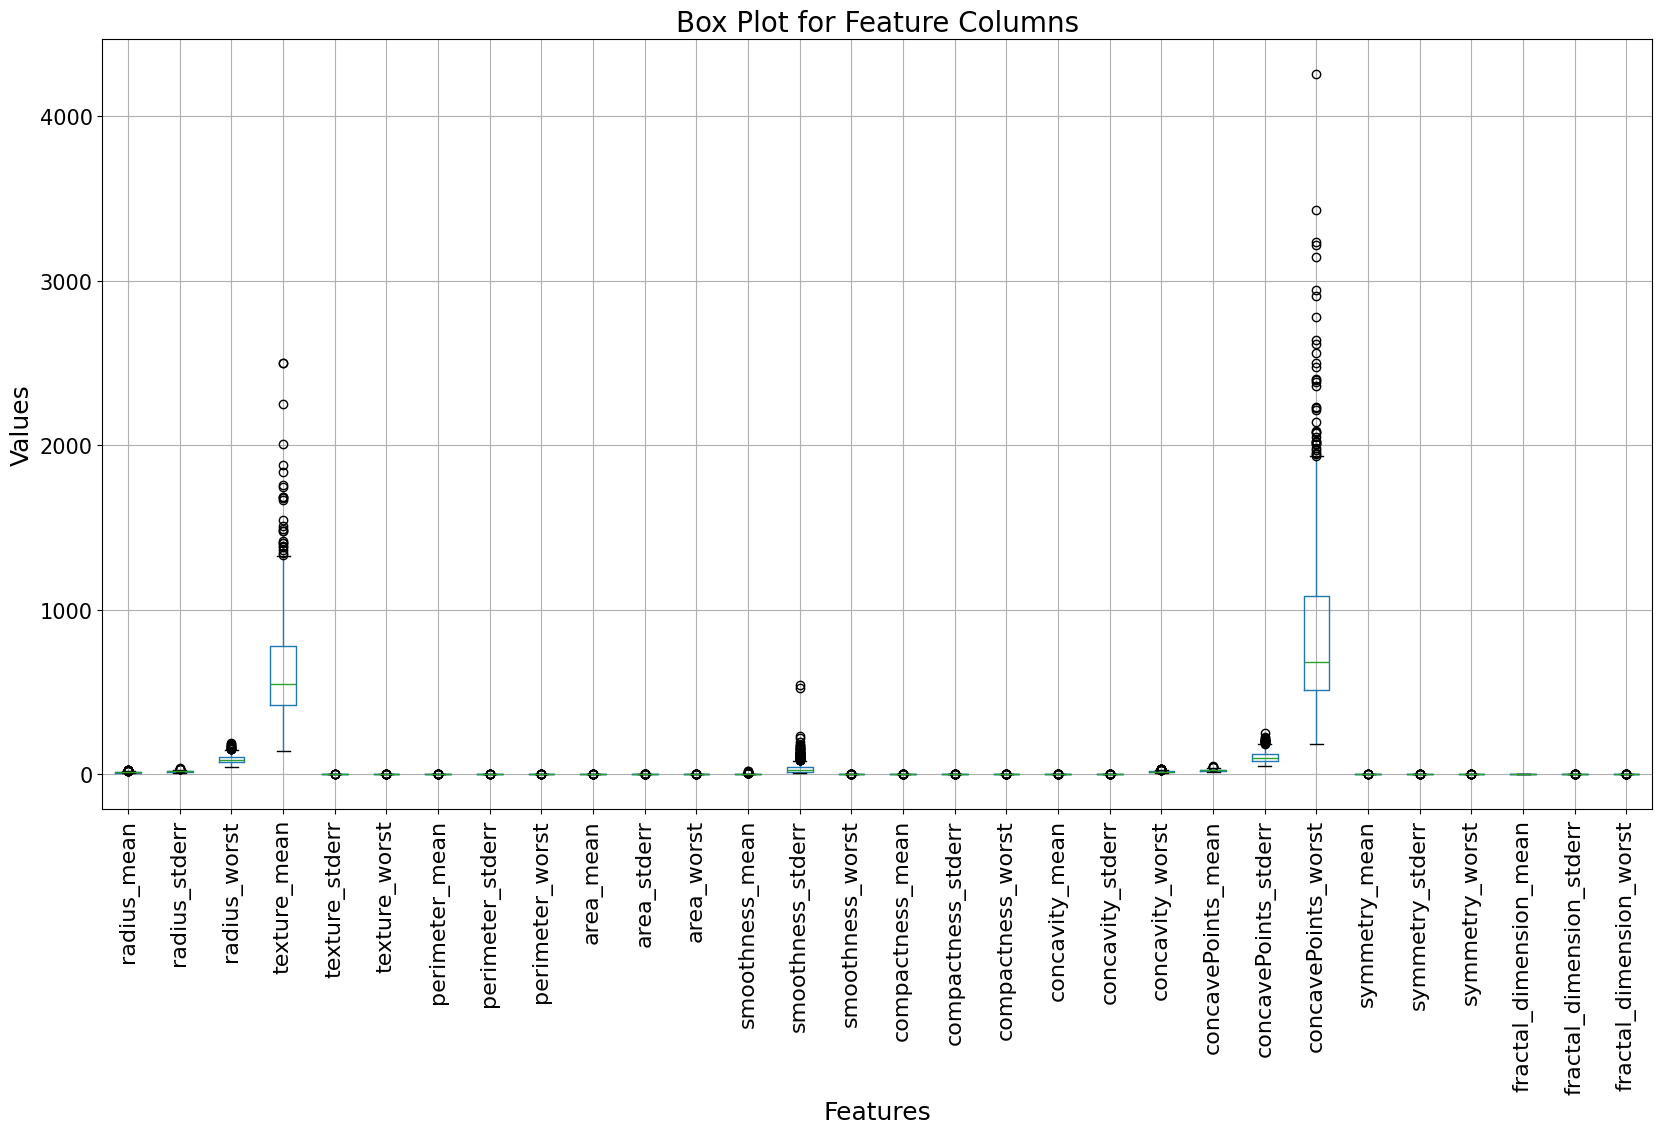

In [3]:
def check_outliers_boxplot(df, columns):
    plt.figure(figsize=(20, 10))
    df[columns].boxplot()

    plt.title("Box Plot for Feature Columns", fontsize=20)

    plt.xticks(rotation=90, fontsize=16)
    plt.yticks(fontsize=15)

    plt.xlabel('Features', fontsize=18)
    plt.ylabel('Values', fontsize=18)

    plt.show()


# 分布を評価
feature_columns = [col for col in df.columns if col not in ['id', 'diagnosis']]
check_outliers_boxplot(df, feature_columns)

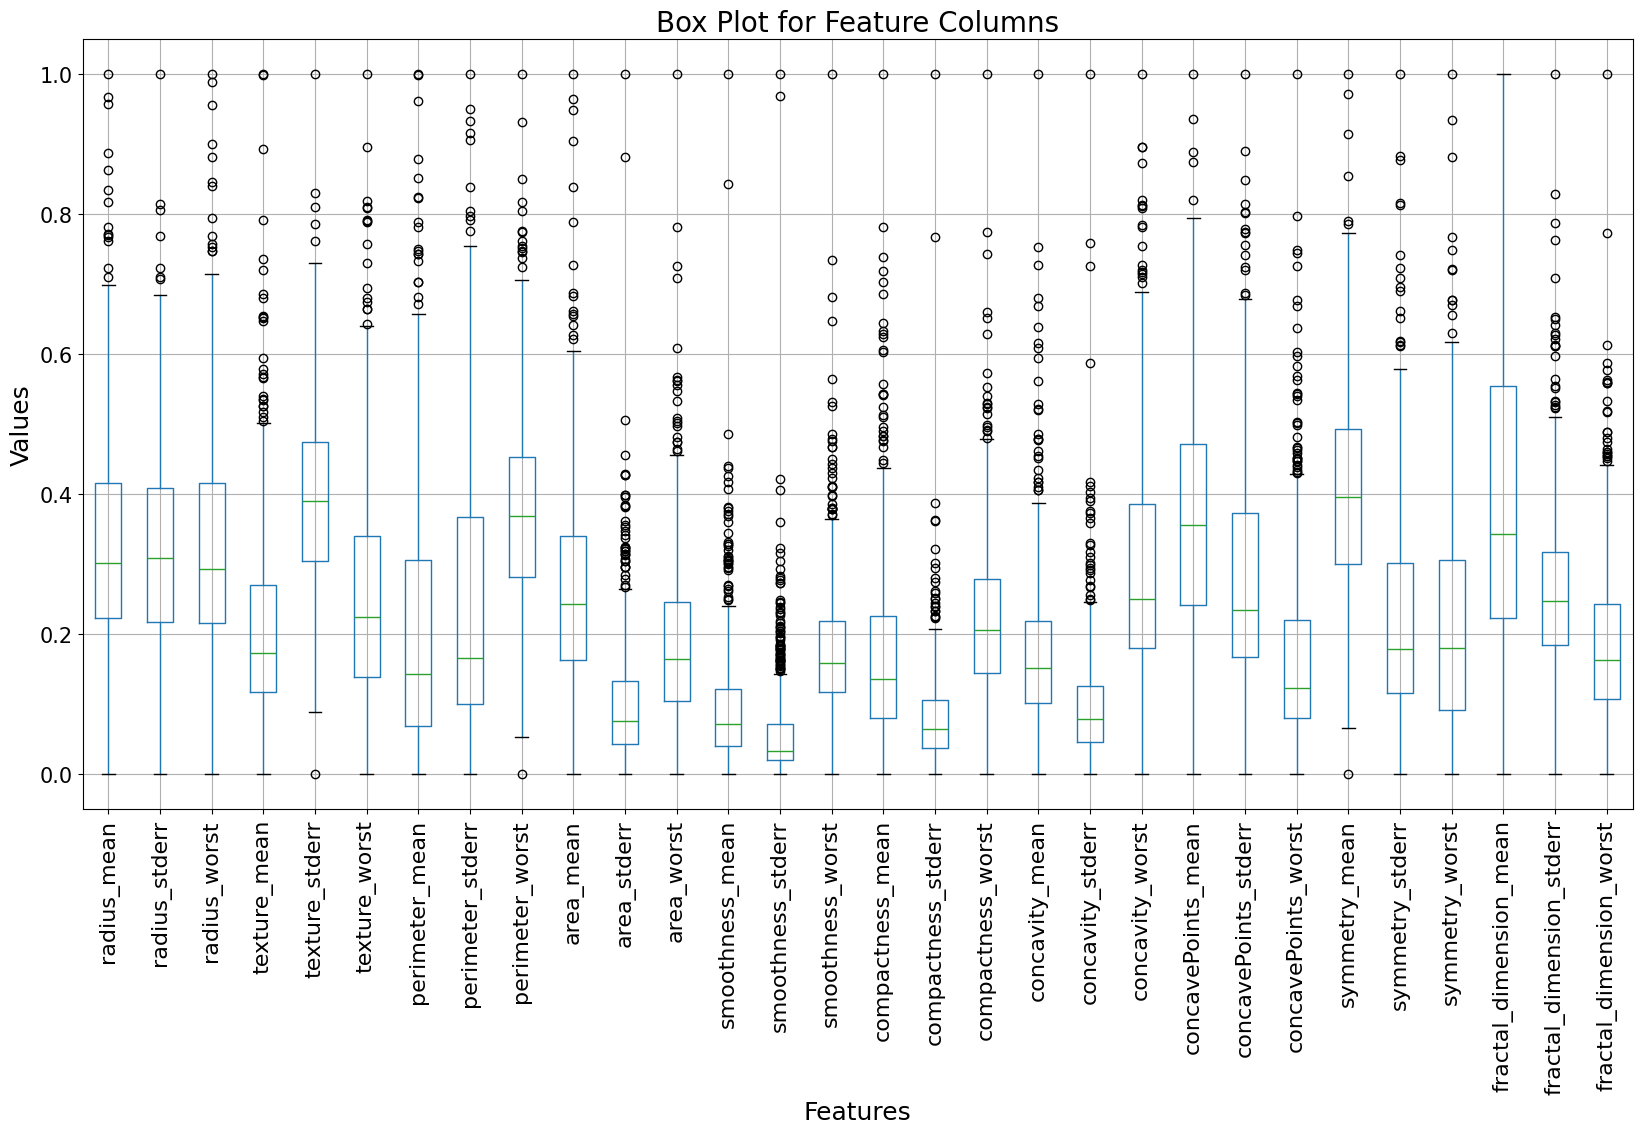

In [4]:
df_norm = normalize(df, feature_columns)
check_outliers_boxplot(df_norm, feature_columns)

### 2-1-2) 分割

In [5]:
import sys
from srcs import dataloader, train, predict
from srcs.modules.plot import plot_multiple_models

In [6]:
sys.argv = [
    'dataloader.py',
    '--dataset_path',   '../data/data.csv',
    '--train_size',     '0.8',
    '--shuffle',        'true',
    '--save_npz',       'false',
    '--save_dir',       '../data',
    # '--save_npz', 'true',
]
args = dataloader.parse_arguments()
_, _, _, _ = dataloader.main(
    csv_path=args.dataset_path,
    train_size=args.train_size,
    shuffle=args.shuffle,
    save_npz=args.save_npz,
    save_dir=args.save_dir,
    random_state=42
)


[Dataloader]
 Dataset: ../data/data.csv
  Splitting...
  Split dataset SUCCESS

 Data_train data saved to /app/data/data_train.csv
 Data_test data saved to /app/data/data_test.csv


## 2-2. 訓練


[Train]
 Dataset: ../data/data_train.csv
 Training WDBC...
  X_train shape: (366, 30)
  X_valid shape: (90, 30)


 Metrics: 
  Train [Accuracy:0.9918, Precision:1.0000, Recall:0.9781, F1:0.9889]
  Valid [Accuracy:0.9778, Precision:1.0000, Recall:0.9394, F1:0.9688]

 Model data saved to /app/data/model.pkl
 Metrics saved to /app/data/metrics.npz


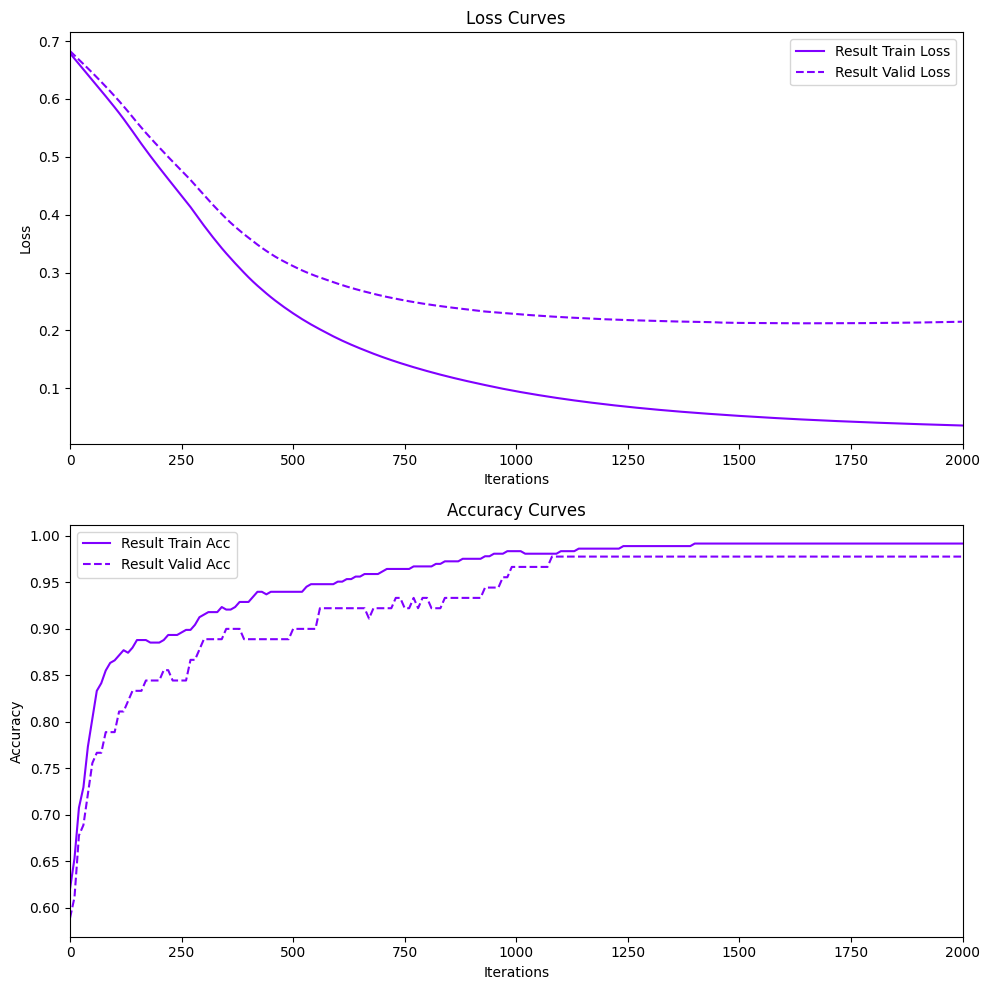

In [8]:
sys.argv = [
    'train.py',
    '--dataset_path',       '../data/data_train.csv',
    '--hidden_features',    '50 30',
    '--epochs',             '2000',
    '--learning_rate',      '0.0001',
    '--optimizer',          'Adam',
    '--verbose',            'false',
    '--plot',               'false',
    '--metrics_interval',   '10',
    '--save_dir',           '../data',
]
args = train.parse_arguments()
_, iterations, train_losses, train_accs, valid_losses, valid_accs = train.main(
    dataset_path=args.dataset_path,
    hidden_features=args.hidden_features,
    epochs=args.epochs,
    learning_rate=args.learning_rate,
    weight_decay=args.weight_decay,
    optimp_str=args.optimizer,
    verbose=args.verbose,
    plot=args.plot,
    metrics_interval=args.metrics_interval,
    patience=args.patience,
    save_dir=args.save_dir,
)

models_results = []
models_results.append({
    'name'          : "Result",
    'iterations'    : iterations,
    'train_losses'  : train_losses,
    'train_accs'    : train_accs,
    'valid_losses'  : valid_losses,
    'valid_accs'    : valid_accs
})

plot_multiple_models(max_itr=2000, models_results=models_results)

## 2-3. 予測

In [9]:
sys.argv = [
    'predict.py',
    '--model_path',     '../data/model.pkl',
    '--dataset_path',   '../data/data_test.csv',
]
args = predict.parse_arguments()
_ = predict.main(
    model_path=args.model_path,
    dataset_path=args.dataset_path,
)



[Predict]
 Dataset: ../data/data_test.csv

 Predicting WDBC...
  Pred [Accuracy:0.9469, Precision:0.9737, Recall:0.8810, F1:0.9250]


# 3. Appendix

## 評価メトリクス

### 混同行列
- TP (True Positive) : 正と予測し、実際に正
- TN (True Negative) : 負と予測し、実際に負
- FP (False Positive) : 正と予測したが、実際には負, 偽陽性
- FN (False Negative) : 負と予測したが、実際には正, 偽陰性

<img src="./img/confusion_matrix.png" style="width: 600px;"/>

引用 [環境省 3.5 AI判読結果の把握可能精度・網羅率の検証
](https://www.renewable-energy-potential.env.go.jp/RenewableEnergy/dat/report/r03-01/r03-01_chpt3_Part2.pdf)



#### 正解率: Accuracy
* 全データの中で正しく分類できた割合
$$
Accuracy  = \frac{TP + TN}{TP + FP + TN + FN}
$$


#### 適合率・精度: Precision
* 正と予測した中で、実際に正だった割合（誤検出しない確率）
* 高いほど精度が良く、間違った分類が少ない
* スパムメールのフィルタリング
$$
Precision = \frac{TP}{TP + FP}
$$


#### 再現率・真陽性率: Recall
* 実際に正であるデータのうち、正と予測した割合（見逃さない確率）
* 高いほど性能が良く、偽陽性の判断が少ない
* 病気の診断
$$
Recall    = \frac{TP}{TP + FN}
$$


#### F値: F1-Score
* 適合率と再現率の調和平均
$$
F1 Score  = 2 \times \frac{Precision \times Recall}{Precision + Recall}
$$
